In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('C:/Users/HF/Desktop/mingsu/Part 3 - 머신러닝과 패턴인식/Chapter 1. 철판 제조 공정 데이터를 활용한 분류모형 생성 및 성능 비교')
path = "./data"
file_list = os.listdir(path)

print ("file_list: {}".format(file_list))

file_list: ['Faults.NNA', 'Faults27x7_var']


In [2]:
# 데이터를 읽어옵니다.
df = pd.read_csv("data/Faults.NNA",  delimiter='\t', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [3]:
# 칼럼 레이블을 읽어와서 데이터 프레임의 칼럼명으로 지정합니다.
attributes_name=pd.read_csv("data/Faults27x7_var",  delimiter=' ', header=None)
df.columns=attributes_name[0]
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [4]:
print(df.shape)


(1941, 34)


In [5]:
#Cpu의 개수를 확인합니다.
n_cpu=os.cpu_count()
print("The number of cpus: ",n_cpu)
n_thread=n_cpu*2
print("Expected number of threads:",n_thread)

The number of cpus:  16
Expected number of threads: 32


In [6]:
## Step 1. 데이터 전처리 및 탐색적 데이터 분석

### 문제 1. 종속변수 범주화 (1) - boolean Seris로 이루어진 list 구성

- 7개의 종속변수들을 각 종속변수가 1인지 아닌지 여부를 알리는 boolean 논리 연산자로 이루어진 seris 형태로 변경합니다. 각 Seris의 길이는 1941입니다.
- 이 7개의 Seris를 list로 이어 붙여 길이 7짜리 list를 만들어 conditions라는 이름으로 저장합니다.
- 여러 방법이 존재합니다. 방법 1,2는 코드를 제공드리며 풀어주실 문제는 방법3입니다.

In [7]:
## 방법 1. 논리적 연산자 &를 활용하여 생성합니다.
conditions=[(df['Pastry'] == 1) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0),
            (df['Pastry'] == 0) & (df['Z_Scratch'] == 1)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0),
            (df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 1)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0),
            (df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 1)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0),
            (df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 1)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0),
            (df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 1)& (df['Other_Faults'] == 0),
            (df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 1)]



In [8]:
## 방법 2. pandas.Series.astype을 활용합니다.
conditions=[df['Pastry'].astype(bool),
            df['Z_Scratch'].astype(bool),
            df['K_Scatch'].astype(bool),
            df['Stains'].astype(bool),
            df['Dirtiness'].astype(bool),
            df['Bumps'].astype(bool),
            df['Other_Faults'].astype(bool)]

In [9]:
## (문제) 방법 3. pandas.Series.astype과 map, lambda를 활용합니다
# conditions_bf에 각 변수들의 Seris로 list를 구성합니다.
# conditions_bf을 사용하고 map, lambda를 활용하여 conditions_bf의 각 원소에 astype 함수를 적용합니다.

conditions_bf=[
            df['Pastry'],
            df['Z_Scratch'],
            df['K_Scatch'],
            df['Stains'],
            df['Dirtiness'],
            df['Bumps'],
            df['Other_Faults']
]
conditions = list(map(lambda i: i.astype(bool), conditions_bf))

In [10]:
# 잘 진행되었는지 확인합니다.
print(conditions)

[0        True
1        True
2        True
3        True
4        True
        ...  
1936    False
1937    False
1938    False
1939    False
1940    False
Name: Pastry, Length: 1941, dtype: bool, 0       False
1       False
2       False
3       False
4       False
        ...  
1936    False
1937    False
1938    False
1939    False
1940    False
Name: Z_Scratch, Length: 1941, dtype: bool, 0       False
1       False
2       False
3       False
4       False
        ...  
1936    False
1937    False
1938    False
1939    False
1940    False
Name: K_Scatch, Length: 1941, dtype: bool, 0       False
1       False
2       False
3       False
4       False
        ...  
1936    False
1937    False
1938    False
1939    False
1940    False
Name: Stains, Length: 1941, dtype: bool, 0       False
1       False
2       False
3       False
4       False
        ...  
1936    False
1937    False
1938    False
1939    False
1940    False
Name: Dirtiness, Length: 1941, dtype: bool, 0       False
1 

In [11]:
print(type(conditions))
print(type(conditions[0]))
print(len(conditions))
print(len(conditions[0]))

<class 'list'>
<class 'pandas.core.series.Series'>
7
1941


### 문제 2. 종속변수 범주화 (2) - numpy.select를 활용한 범주화
- 범주화 시 범주명은 각 종속변수의 칼럼명을 그대로 활용합니다.
- (핵심) select 함수는 list 각 원소별로 TRUE인 것들의 값을 지정해줍니다.
- 범주화하여 기존 데이터프레임에 새로운 칼럼 'class'로 저장합니다.

In [12]:
choices = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

In [13]:
# (문제) numpy.select를 사용하고 위에 정의해드린 choices를 인수로 활용하여 범주화를 진행합니다.
df['class'] = np.select(conditions, choices)

In [14]:
# 아래와 같이 class 칼럼이 생성되고 범주화 된 것을 확인할 수 있습니다.
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,class
0,42,50,270900,270944,267,17,44,24220,76,108,...,-0.2913,0.5822,1,0,0,0,0,0,0,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,-0.1756,0.2984,1,0,0,0,0,0,0,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,-0.1228,0.2150,1,0,0,0,0,0,0,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,-0.1568,0.5212,1,0,0,0,0,0,0,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,-0.1992,1.0000,1,0,0,0,0,0,0,Pastry


### 문제 3. EDA - 결측치 확인하기

In [15]:
# (문제) pandas.isnull를 활용해 모든 변수에 대하여 결측치가 얼마나 존재하는지를 파악합니다.
df.isnull().sum()

0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
class                    0
dtype: int64

### 문제 4. EDA - 기술통계량 파악하기
- pandas.DataFrame.describe를 활용해 기술통계량을 파악합니다.
 - min과 25% Quantile, max와 75% Quantile을 비교해 이상치 존재가능성에 대해서 파악할 수 있습니다.
 - mean과 50% Quantile을 비교하여 분포의 치우침 정도를 파악할 수 있습니다.
 - 범주형 변수에 대해서는 정보가 제한적입니다
- pandas.Series.value_counts를 활용해 범주화한 종속변수의 기술통계량을 파악합니다.
 - 어떠한 불량타입이 많이 분포하고 적게 분포하는지 파악할 수 있습니다.
 - 적게 분포하는 불량타입의 경우는 예측모형을 구축하는 것이 상대적으로 더 어려울 것입니다.

In [16]:
# (문제) pandas.DataFrame.describe를 활용해 기술통계량을 파악합니다.
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# (문제) pandas.Series.value_counts를 활용해 범주화한 종속변수의 기술통계량을 파악합니다.
df['class'].value_counts()

Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: class, dtype: int64

### 문제 5. 산점도를 통한 변수간의 상관관계 파악

In [18]:
import matplotlib.pyplot as plt

In [19]:
color_code = {'Pastry':'Red', 'Z_Scratch':'Blue', 'K_Scatch':'Green', 'Stains':'Black', 'Dirtiness':'Pink', 'Bumps':'Brown', 'Other_Faults':'Gold'}

In [20]:
# (문제) for문과 위에 정의해드린 dictionary를 활용하여 데이터의 각 행에 해당하는 color값을 지정하는 list를 생성하여 color_list에 저장합니다.
color_list = [color_code.get(i) for i in df.loc[:, 'class']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024F0ED78C08>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

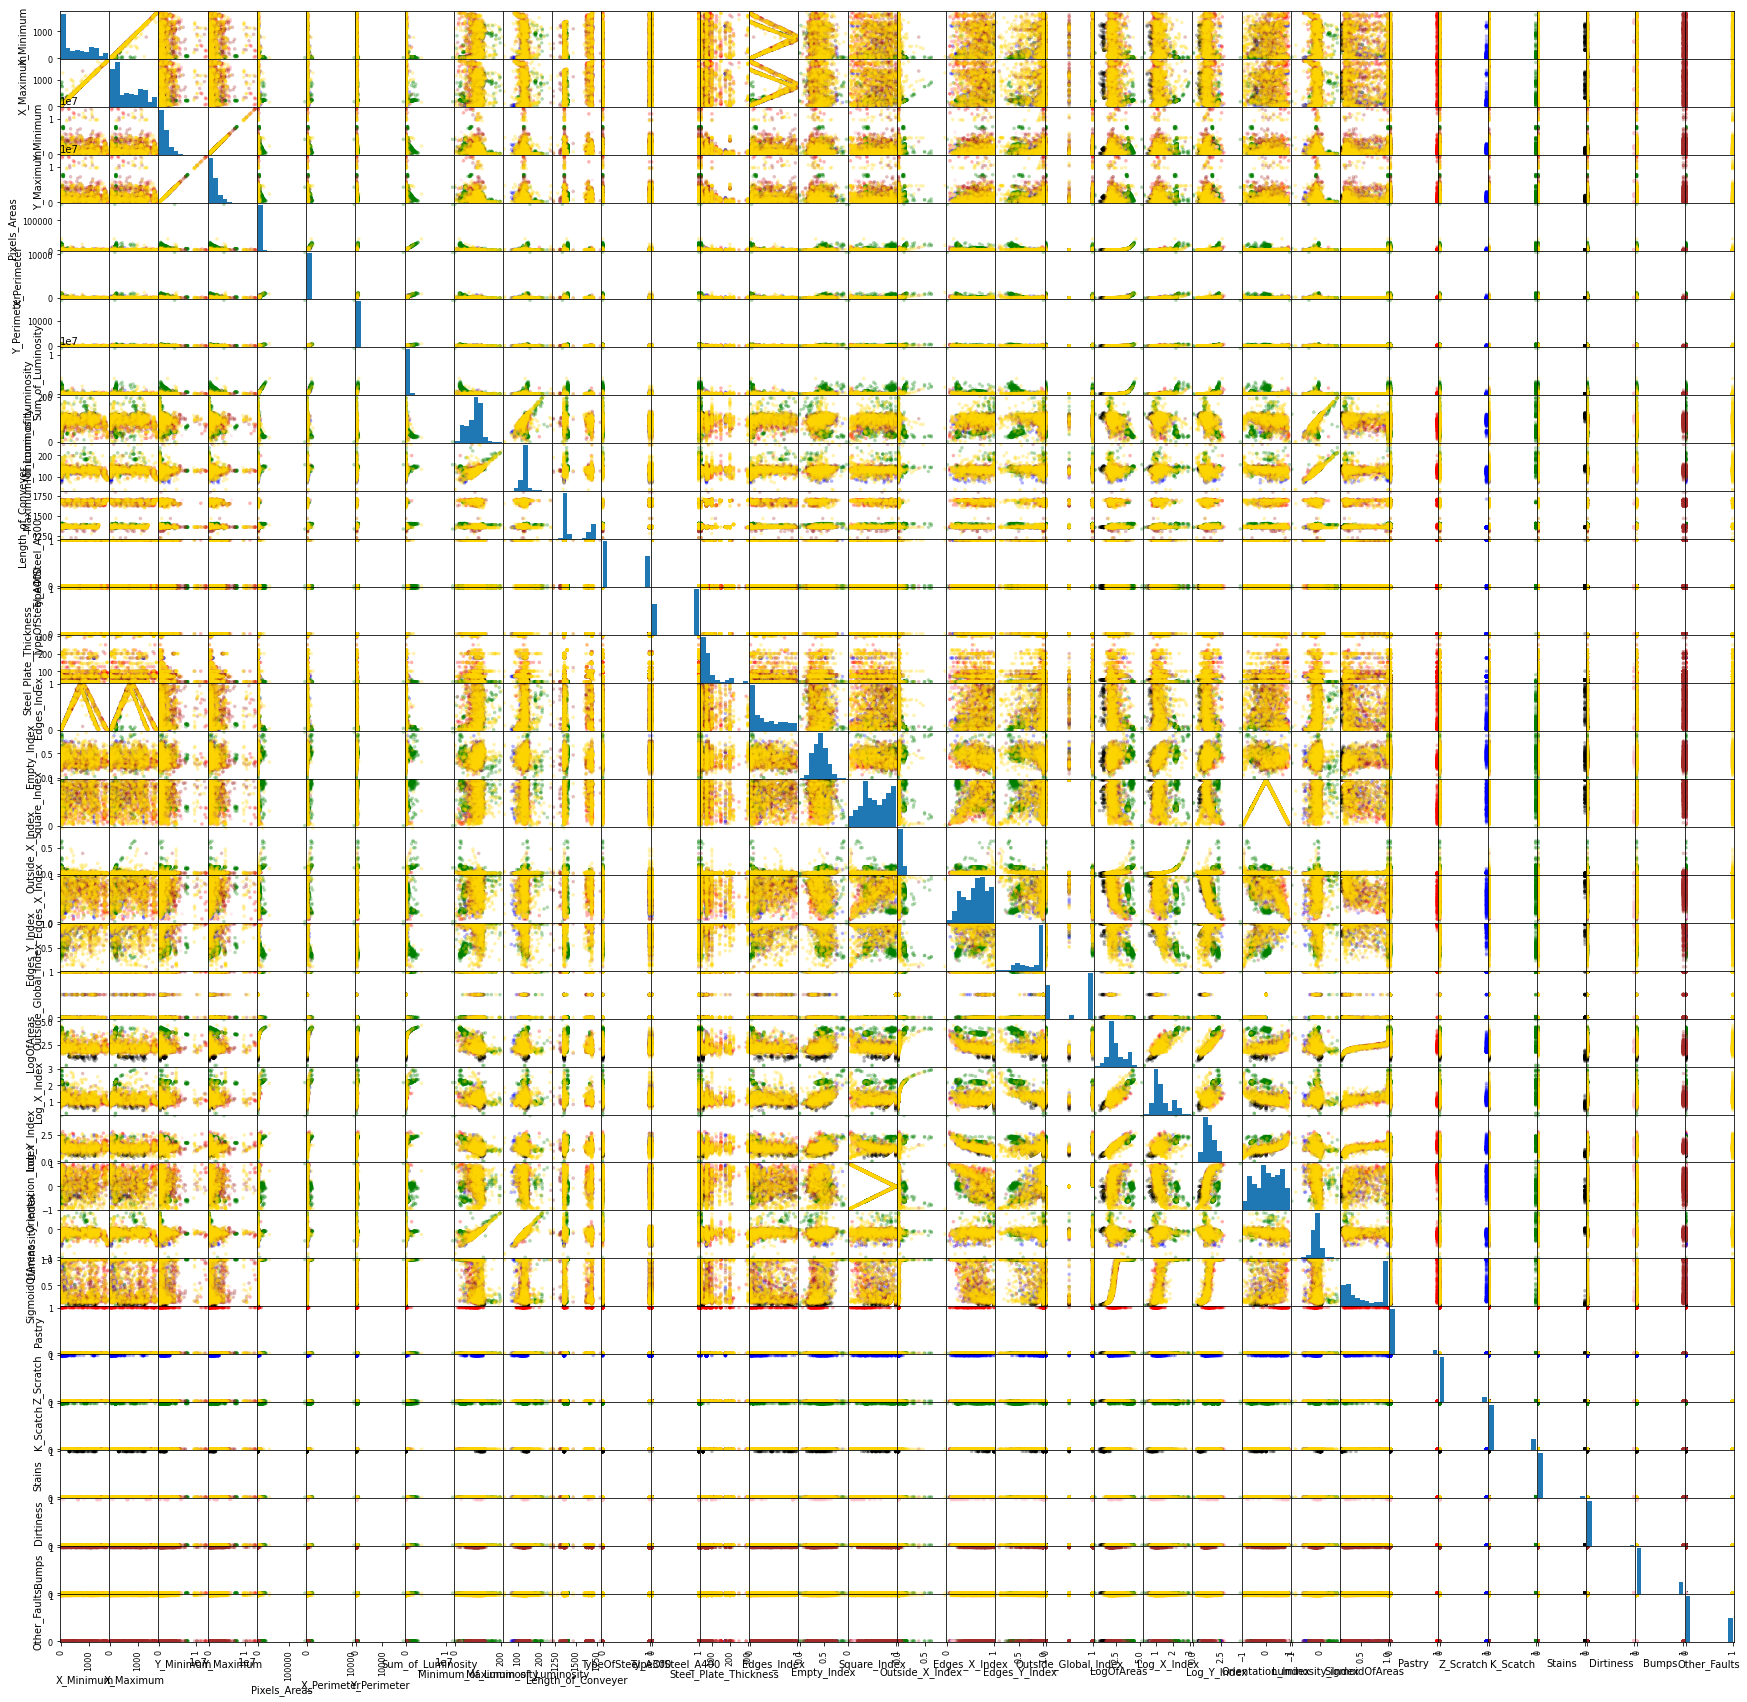

In [21]:
# (문제) pandas.plotting.scatter_matrix, 위에서 만든 color_list를 활용해 scatter plot을 그리고 대각원소에는 히스토그램을 출력해봅니다. figsize= [30,30], alpha=0.3,s = 50 으로 지정합니다.
pd.plotting.scatter_matrix(df.loc[:, df.columns!='class'], c=color_list, figsize=[30,30], alpha=0.3, s=50, diagonal='hist')

### 문제 6. 범주형 변수의 분포 시각화

In [22]:
import seaborn as sns
sns.set_style("white")

c:\users\hf\desktop\mingsu\object_detection\myplace\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\hf\desktop\mingsu\object_detection\myplace\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'The number of Defects by Defect type')

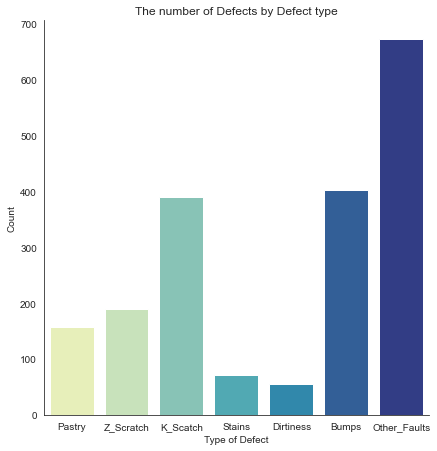

In [23]:
# (문제) seaborn.factorplot을 활용하여 Barplot으로 "class" 변수의 카운트를 표현합니다. 적절한 x축, y축, plot의 title까지 지정해줍니다.
g=sns.factorplot(x='class', data=df, kind='count', palette = 'YlGnBu',size=6)
g.ax.xaxis.set_label_text('Type of Defect')
g.ax.yaxis.set_label_text('Count')
g.ax.set_title('The number of Defects by Defect type')

c:\users\hf\desktop\mingsu\object_detection\myplace\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\hf\desktop\mingsu\object_detection\myplace\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


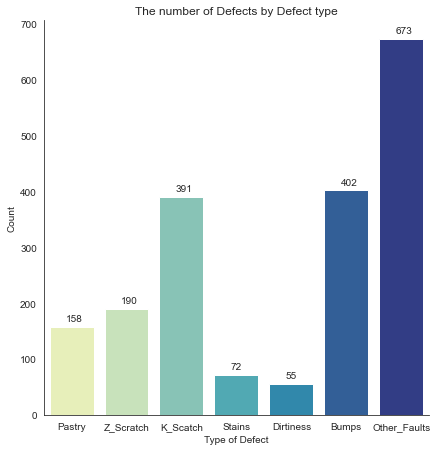

In [24]:
# 이전 cell에서 완성한 코드를 복사 붙여넣기 합니다.
g=sns.factorplot(x='class', data=df, kind='count', palette = 'YlGnBu',size=6)
g.ax.xaxis.set_label_text('Type of Defect')
g.ax.yaxis.set_label_text('Count')
g.ax.set_title('The number of Defects by Defect type')
# (문제) Barplot의 bar 상단에 값을 text로 달아줍니다.
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+10))

### 문제 7. 상관계수를 활용한 변수간의 상관관계 파악

In [25]:
df_corTarget = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]


In [26]:
# (문제) df_corTarget에 대하여, pandas.DataFrame.corr 을 활용해 correlation을 구한 뒤 corr에 저장.
corr = df_corTarget.corr()
corr

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,,,,,,,,,,,,,,,,,,,,,
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,...,-0.361160,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,...,-0.214930,0.149259,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,...,0.054165,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,...,0.054185,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,...,0.588606,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,...,0.517098,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,...,0.209160,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,...,0.658339,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,...,-0.487574,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797


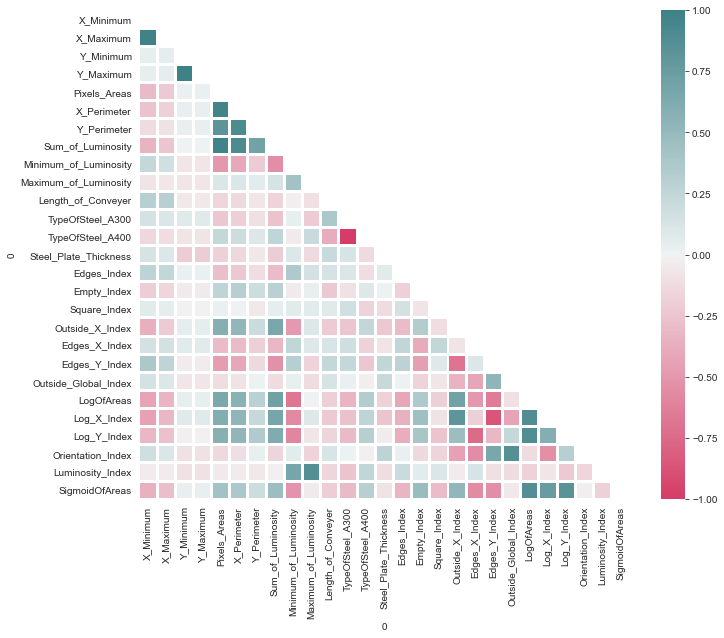

In [27]:
# heatmap을 그리기 위한 파라미터들 설정
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(1,200, as_cmap=True)

# (문제) 저장해둔 corr과 mask, cmap을 활용하여 correlation을 표현하는 heatmap을 그립니다. correlation에 맞게 최대, 최소, 중간값을 지정해줍니다.
# linewidths=2로 설정합니다. 그림 크기는 figsize=(11,9)로 설정합니다.
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, linewidths=2)

### 문제 8. Training, Test set 분리하기

In [28]:
x = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300',  'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]
y = df['K_Scatch']

In [29]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [30]:
# (문제) sklearn.model_selection.train_test_split을 활용하여, x_train, x_test, y_train, y_test로 데이터를 나눕니다
# 그 비율은 8:2로 합니다. y값에 따라 stratify하여 나눕니다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33, stratify=y)


In [31]:
# (문제) pandas.DataFrame.apply를 활용하여  x_train과 x_test를 표준화합니다.
x_train = x_train.apply(zscore)
x_test = x_test.apply(zscore)

In [32]:
x_train.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,...,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03
mean,4.120415e-17,7.325183e-17,1.716840e-17,-3.662591e-17,1.831296e-17,-2.746944e-17,2.060208e-17,9.156479e-18,1.602384e-17,-1.281907e-16,...,2.918628e-17,3.468016e-16,3.857167e-16,9.156479e-17,2.426467e-16,6.289356e-16,1.533710e-16,-1.659612e-17,-1.373472e-16,-2.260506e-16
std,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,...,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00
min,-1.095854e+00,-1.235229e+00,-9.309397e-01,-9.309569e-01,-3.527332e-01,-3.487253e-01,-1.806628e-01,-3.934815e-01,-2.618708e+00,-5.102103e+00,...,-5.370619e-01,-2.445498e+00,-3.241405e+00,-1.183278e+00,-2.779450e+00,-2.157422e+00,-3.080917e+00,-2.146320e+00,-5.160488e+00,-1.385554e+00
25%,-9.996466e-01,-8.543026e-01,-6.794683e-01,-6.794748e-01,-3.376870e-01,-3.088392e-01,-1.553398e-01,-3.761715e-01,-6.681726e-01,-3.401872e-01,...,-4.520606e-01,-8.293113e-01,-9.154680e-01,-1.183278e+00,-7.174464e-01,-7.065471e-01,-7.151621e-01,-8.273694e-01,-4.372847e-01,-9.885745e-01
50%,-2.896380e-01,-3.171755e-01,-2.516430e-01,-2.516642e-01,-3.217345e-01,-2.720212e-01,-1.300168e-01,-3.583082e-01,1.677713e-01,-1.759832e-01,...,-3.903929e-01,1.007954e-01,5.497445e-01,8.871249e-01,-3.266736e-01,-3.410263e-01,-1.824727e-01,2.332051e-02,-3.643323e-03,-2.203506e-01
75%,9.317115e-01,9.122712e-01,3.192776e-01,3.192612e-01,-2.091147e-01,-1.025049e-01,-7.622455e-03,-2.401974e-01,6.631454e-01,5.355674e-01,...,-1.687227e-01,7.955392e-01,8.123709e-01,8.871249e-01,5.115377e-01,3.696741e-01,7.513779e-01,8.437289e-01,4.426517e-01,1.219958e+00
max,2.184809e+00,2.209237e+00,6.473946e+00,6.473875e+00,2.732010e+01,3.170442e+01,3.812245e+01,2.116198e+01,3.666351e+00,6.720585e+00,...,1.403651e+01,1.620651e+00,8.123709e-01,8.871249e-01,3.403395e+00,3.598545e+00,6.254739e+00,1.829783e+00,5.284525e+00,1.220550e+00



## Step 2. 로지스틱 분류 모형


### 문제 9. [로지스틱 회귀분석] 로지스틱 기본 모형 만들기

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [34]:
# (문제) 로지스틱 회귀분석 모형을 만들어 lm에 저장합니다. solver는 'liblinear'로 설정합니다.
lm = LogisticRegression(solver='liblinear')

- penalty : 회귀계수들이 너무 큰 값을 가지지 않게 제한하는 역할
- C : 제한하는 정도의 실수값을 C. C값이 작을수록 강하게 제한

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### 문제 10. [로지스틱 회귀분석] Grid Search 구축 (Lidge, Lasso Penalty / Threshold)

In [35]:
# (문제) 로지스틱에서 고려해야할 Penalty의 형태 (Ridge, Lasso), regularization parameter range를 설정하여 이를 parameters에 dictionary 형태로 저장합니다.
parameters={'penalty' : ['l1', 'l2'], 'C' : [0.01,0.1,0.5,0.9,1,5,10], 'tol':[1e-4, 1e-2, 1, 1e2]}

In [36]:
# (문제) sklearn.model_selection.GridSearchCV를 활용해 cv값 10, n_jobs값은 n_thread로, scoreing은 "accuracy"로 Grid Search를 세팅하고 이를 GSLR에 저장합니다.
GSLR = GridSearchCV(lm, parameters, cv=10, n_jobs=n_thread, scoring='accuracy')

In [37]:
# (문제) Grid Search를 fit함수를 활용하여 수행합니다.
GSLR.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'), n_jobs=32,
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1, 5, 10],
                         'penalty': ['l1', 'l2'],
                         'tol': [0.0001, 0.01, 1, 100.0]},
             scoring='accuracy')

In [38]:
# 최적의 파라미터 값 및 정확도 (Accuracy) 출력
print('final params', GSLR.best_params_)
print('best score', GSLR.best_score_)

final params {'C': 0.9, 'penalty': 'l1', 'tol': 0.0001}
best score 0.974871794871795


### 문제 11. [로지스틱 회귀분석] 모형 평가 및 최적 로지스틱 모형 구축

In [39]:
# (문제) predict 함수를 활용하여 예측 값을 구해 이를 predicted 에 저장합니다.
predicted = GSLR.predict(x_test)

In [40]:
# (문제) sklearn.metrics.confusion_matrix 활용하여 confusion_matrix를 구하고 이를 출력합니다.
cMartix = confusion_matrix(y_test, predicted)
print(cMartix)
print('\n Accuracy:', GSLR.score(x_test, y_test))

[[304   7]
 [  6  72]]

 Accuracy: 0.9665809768637532


In [41]:
# (문제) sklearn.metrics.classification_report를 활용하여 report를 출력합니다.
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       311
           1       0.91      0.92      0.92        78

    accuracy                           0.97       389
   macro avg       0.95      0.95      0.95       389
weighted avg       0.97      0.97      0.97       389



In [42]:
# Cross validation 과정에서 계산된 정확도 값들을 출력해줍니다.
means = GSLR.cv_results_['mean_test_score']
stds = GSLR.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, GSLR.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

0.949 (+/-0.033) for {'C': 0.01, 'penalty': 'l1', 'tol': 0.0001}
0.948 (+/-0.031) for {'C': 0.01, 'penalty': 'l1', 'tol': 0.01}
0.948 (+/-0.035) for {'C': 0.01, 'penalty': 'l1', 'tol': 1}
0.798 (+/-0.005) for {'C': 0.01, 'penalty': 'l1', 'tol': 100.0}
0.956 (+/-0.028) for {'C': 0.01, 'penalty': 'l2', 'tol': 0.0001}
0.956 (+/-0.028) for {'C': 0.01, 'penalty': 'l2', 'tol': 0.01}
0.956 (+/-0.027) for {'C': 0.01, 'penalty': 'l2', 'tol': 1}
0.798 (+/-0.005) for {'C': 0.01, 'penalty': 'l2', 'tol': 100.0}
0.965 (+/-0.023) for {'C': 0.1, 'penalty': 'l1', 'tol': 0.0001}
0.965 (+/-0.023) for {'C': 0.1, 'penalty': 'l1', 'tol': 0.01}
0.959 (+/-0.027) for {'C': 0.1, 'penalty': 'l1', 'tol': 1}
0.798 (+/-0.005) for {'C': 0.1, 'penalty': 'l1', 'tol': 100.0}
0.966 (+/-0.030) for {'C': 0.1, 'penalty': 'l2', 'tol': 0.0001}
0.966 (+/-0.030) for {'C': 0.1, 'penalty': 'l2', 'tol': 0.01}
0.963 (+/-0.024) for {'C': 0.1, 'penalty': 'l2', 'tol': 1}
0.798 (+/-0.005) for {'C': 0.1, 'penalty': 'l2', 'tol': 100.0}


## Step 3. 의사결정나무 모형

### 문제 12. [의사결정나무] 의사결정나무 기본 모형 만들기

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
# (문제) 의사결정나무 모형을 만들어 dt에 저장합니다.
dt = DecisionTreeClassifier()

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### 문제 13. [의사결정나무] Grid Search 구축 (Loss function / Prunning)

In [45]:
# (문제) 의사결정나무에서 고려해야할 criterion, min_samples_split, max_depth, min_samples_leaf, max_features 등을 고려하여 Grid search를 수행합니다.
# GridSearchCV의 옵션은 cv=10, n_jobs=n_thread, scoreing="accuracy"로 설정합니다.
parameters = {'criterion':['gini','entropy'], 'min_samples_split':[2,5,10,15], 'max_depth':[None, 2],
'min_samples_leaf':[1,3,10,15], 'max_features':[None, 'sqrt', 'log2']}

In [46]:
GSDT =GridSearchCV(dt, parameters, cv=10, n_jobs=n_thread, scoring='accuracy')
GSDT.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=32,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 10, 15],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [47]:
print('final params', GSDT.best_params_)
print('accuracy', GSDT.best_score_)

final params {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
accuracy 0.9768196856906535


### 문제 14. [의사결정나무]  모형 평가 및 최적 의사결정나무 구축

In [48]:
# (문제) predict 함수를 활용하여 예측 값을 구해 이를 predicted 에 저장하고 이를 출력하며 classification_report 또한 출력합니다.
predicted = GSDT.predict(x_test)
cMartix = confusion_matrix(y_test, predicted)
print(cMartix)
print(round(GSDT.score(x_test, y_test), 3))

print(metrics.classification_report(y_test, predicted))

[[304   7]
 [  1  77]]
0.979
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       311
           1       0.92      0.99      0.95        78

    accuracy                           0.98       389
   macro avg       0.96      0.98      0.97       389
weighted avg       0.98      0.98      0.98       389



In [49]:
# Train에서의 종속변수의 분포
print(y_train.value_counts())

0    1239
1     313
Name: K_Scatch, dtype: int64


In [50]:
# 트리 시각화
import graphviz
from sklearn import tree

dt2=DecisionTreeClassifier(criterion='entropy',max_depth=None,max_features=None,min_samples_leaf=1,min_samples_split=5)
dt2.fit(x_train,y_train)
dot_data=tree.export_graphviz(dt2,feature_names=x_train.columns,filled=True,rounded=True)
graph=graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

## Step 4. Random Forest

- Random Forest는 아래의 Bagging과 Drop-out을 활용하여 의사결정나무의 변동성을 완화시키고 예측력을 높인 모델이다.
 - Bootstrapping: 복원추출을 통하여 샘플 구성이 조금씩 다른 여러 데이터셋을 생성해냄.
 - Aggregating: 여러 모형의 결과를 통합하여 모형의 변동성을 낮춤.
 - Drop-out: Tree를 구성할 때 변수를 일부 탈락시킴. Tree간의 correlation을 감소시켜 이 또한 모형의 변동성을 완화시키고,
 변동성을 높이는데 도움이 됨(학습시에만 제거, test시 사용)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [52]:
svc = svm.SVC()
parameters = {'C':[0.01,0.1,0.5,0.9,1,5,10], 'kernel':['linear','rbf','poly'], 'gamma':[0.1,1,10]}
GS_SVM = GridSearchCV(svc, parameters, cv=10, n_jobs=n_thread, scoring='accuracy')
GS_SVM.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=32,
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1, 5, 10],
                         'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [53]:
print('final params' , GS_SVM.best_params_)
print('accuracy' , GS_SVM.best_score_)

final params {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy 0.9819602977667493


In [54]:
predicted = GS_SVM.predict(x_test)
cMartix = confusion_matrix(y_test, predicted)
print(cMartix)
print(metrics.classification_report, predicted)
# 의사결정나무에 비해 변동성이 크지 않음, 다소 낮은 퍼포먼스를 보임

[[311   0]
 [ 11  67]]
<function classification_report at 0x0000024F57991A68> [1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


## ANN신경망 모형



In [56]:
from sklearn.neural_network import MLPClassifier

In [57]:
nn_model = MLPClassifier(random_state = 43)

In [61]:
parameters = {'alpha':[1e-3, 1e-1, 1e1], 'hidden_layer_sizes':[(5),(30),(60)], 'activation':['tanh','relu'],
              'solver':['adam', 'lbfgs']}
GS_NN = GridSearchCV(nn_model, parameters, cv=10, n_jobs=n_thread, scoring='accuracy')
GS_NN.fit(x_train, y_train)

c:\users\hf\desktop\mingsu\object_detection\myplace\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=10, estimator=MLPClassifier(random_state=43), n_jobs=32,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.001, 0.1, 10.0],
                         'hidden_layer_sizes': [5, 30, 60],
                         'solver': ['adam', 'lbfgs']},
             scoring='accuracy')

In [62]:
print('final_params', GS_NN.best_params_)
print('best_score', GS_NN.best_score_)

final_params {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': 60, 'solver': 'lbfgs'}
best_score 0.9845368072787428


In [65]:
means =GS_NN.cv_results_['mean_test_score']
stds = GS_NN.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, GS_NN.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

0.971 (+/-0.031) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 5, 'solver': 'adam'}
0.968 (+/-0.018) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 5, 'solver': 'lbfgs'}
0.979 (+/-0.019) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 30, 'solver': 'adam'}
0.974 (+/-0.021) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 30, 'solver': 'lbfgs'}
0.981 (+/-0.025) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 60, 'solver': 'adam'}
0.981 (+/-0.025) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 60, 'solver': 'lbfgs'}
0.972 (+/-0.031) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 5, 'solver': 'adam'}
0.969 (+/-0.025) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 5, 'solver': 'lbfgs'}
0.977 (+/-0.025) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 30, 'solver': 'adam'}
0.981 (+/-0.023) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_laye

In [66]:
parameters2 = {'alpha':[1e-1], 'hidden_layer_sizes':[(5),(10), (20), (30)], 'activation':['relu'],
              'solver':['lbfgs']}
GS_NN2 = GridSearchCV(nn_model, parameters2, cv=10, n_jobs=n_thread, scoring='accuracy')
GS_NN2.fit(x_train, y_train)

c:\users\hf\desktop\mingsu\object_detection\myplace\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=10, estimator=MLPClassifier(random_state=43), n_jobs=32,
             param_grid={'activation': ['relu'], 'alpha': [0.1],
                         'hidden_layer_sizes': [5, 10, 20, 30],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [67]:
means =GS_NN2.cv_results_['mean_test_score']
stds = GS_NN2.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, GS_NN2.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()


0.977 (+/-0.023) for {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': 5, 'solver': 'lbfgs'}
0.981 (+/-0.023) for {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': 10, 'solver': 'lbfgs'}
0.982 (+/-0.017) for {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': 20, 'solver': 'lbfgs'}
0.983 (+/-0.025) for {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': 30, 'solver': 'lbfgs'}



In [72]:
parameters3 = {'alpha':[1e-1], 'hidden_layer_sizes':[(30, 2), (30, 5)], 'activation':['relu'],
              'solver':['lbfgs']}
GS_NN3 = GridSearchCV(nn_model, parameters3, cv=10, n_jobs=n_thread, scoring='accuracy')
GS_NN3.fit(x_train, y_train)
# 히든레이어를 추가할 때에 모델이 복잡해져서 수렴하지 않는 모습을 볼 수 있음

c:\users\hf\desktop\mingsu\object_detection\myplace\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=10, estimator=MLPClassifier(random_state=43), n_jobs=32,
             param_grid={'activation': ['relu'], 'alpha': [0.1],
                         'hidden_layer_sizes': [(30, 2), (30, 5)],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [69]:
means =GS_NN3.cv_results_['mean_test_score']
stds = GS_NN3.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, GS_NN3.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()


0.981 (+/-0.019) for {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (30, 2), 'solver': 'lbfgs'}
0.979 (+/-0.017) for {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (30, 5), 'solver': 'lbfgs'}



In [73]:
predicted = GS_NN2.predict(x_test)
cMartix = confusion_matrix(y_test, predicted)
print(cMartix)
print(metrics.classification_report(y_test, predicted))

[[303   8]
 [  2  76]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       311
           1       0.90      0.97      0.94        78

    accuracy                           0.97       389
   macro avg       0.95      0.97      0.96       389
weighted avg       0.98      0.97      0.97       389



In [75]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [76]:
# 모델을 만들고 이를 변수에 저장
xgb_model = xgb.XGBClassifier(objective='binary:logistic')

http://xgboost.readthedocs.io/en/latest/parameter.html

In [85]:
parameters = {
    'max_depth':[5,8], 'min_child_weight':[1,5], 'gamma':[0,1], 'colsample_bytree':[0.8,1],
    'colsample_bylevel':[0.9,1], 'n_estimators':[50,100]
}
GS_xgb = GridSearchCV(xgb_model, param_grid=parameters, cv=10, n_jobs=n_thread, scoring='accuracy')
GS_xgb.fit(x_train, y_train)

[19:26:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\hf\desktop\mingsu\object_detection\myplace\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None

In [86]:
print('final params', GS_xgb.best_params_)
print('best score', GS_xgb.best_score_)

final params {'colsample_bylevel': 0.9, 'colsample_bytree': 0.8, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}
best score 0.9864764267990076


In [87]:
parameters2 = {
    'max_depth':[3, 5], 'min_child_weight':[1], 'gamma':[0], 'colsample_bytree':[0.8],
    'colsample_bylevel':[0.9], 'n_estimators':[100, 150]
}
GS_xgb2 = GridSearchCV(xgb_model, param_grid=parameters2, cv=10, n_jobs=n_thread, scoring='accuracy')
GS_xgb2.fit(x_train, y_train)

[19:26:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\hf\desktop\mingsu\object_detection\myplace\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None

In [88]:
print('final params', GS_xgb2.best_params_)
print('best score', GS_xgb2.best_score_)

final params {'colsample_bylevel': 0.9, 'colsample_bytree': 0.8, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}
best score 0.9864764267990076


In [89]:
# predict를 활용해 예측값을 구해 이를 predicted에 저장하고 classfication_report를 출력
predicted = GS_xgb.predict(x_test)
cMartix = confusion_matrix(y_test, predicted)
print(cMartix)
print(metrics.classification_report(y_test, predicted))

[[309   2]
 [  3  75]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       311
           1       0.97      0.96      0.97        78

    accuracy                           0.99       389
   macro avg       0.98      0.98      0.98       389
weighted avg       0.99      0.99      0.99       389



c:\users\hf\desktop\mingsu\object_detection\myplace\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
